In [69]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer



In [70]:
df = pd.read_csv("C:/Users/cbruc/OneDrive/Desktop/amazon_reviews.csv")


In [71]:
df.head(20)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,7/23/2014,138,0,0,0,0,0.0,0.000000
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409,0,0,0,0,0.0,0.000000
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715,0,0,0,0,0.0,0.000000
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5,It's mini storage. It doesn't do anything els...,4/29/2013,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5,I have it in my phone and it never skips a bea...,10/19/2013,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5,It's hard to believe how affordable digital ha...,10/7/2014,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5,Works in a HTC Rezound. Was running short of ...,3/24/2014,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5,"in my galaxy s4, super fast card, and am total...",11/10/2013,393,0,0,0,0,0.0,0.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   int64  
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 460.9+ KB


In [73]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [74]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,7/23/2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513,0,0,0,0,0.0,0.0


In [75]:
df.rename(columns={
    'overall': 'userScore'
}, inplace=True)

df.head()

,reviewerName,userScore,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,NaN,4,No issues.,7/23/2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513,0,0,0,0,0.0,0.0


In [76]:
df.dropna(subset='reviewText', inplace=True)


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4914 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4913 non-null   object 
 1   userScore             4914 non-null   int64  
 2   reviewText            4914 non-null   object 
 3   reviewTime            4914 non-null   object 
 4   day_diff              4914 non-null   int64  
 5   helpful_yes           4914 non-null   int64  
 6   helpful_no            4914 non-null   int64  
 7   total_vote            4914 non-null   int64  
 8   score_pos_neg_diff    4914 non-null   int64  
 9   score_average_rating  4914 non-null   float64
 10  wilson_lower_bound    4914 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 460.7+ KB


In [78]:
df = df.reset_index().rename(columns={'index': 'id'})

In [79]:
df.head()

,id,reviewerName,userScore,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,7/23/2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",10/25/2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,12/23/2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,11/21/2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",7/13/2013,513,0,0,0,0,0.0,0.0


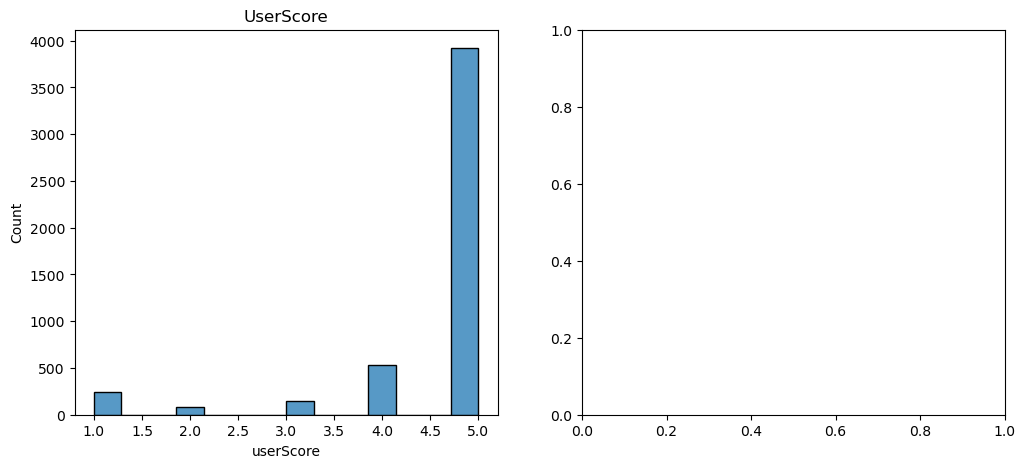

In [80]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(data=df, x='userScore', ax=ax[0]).set_title('UserScore')
plt.show()

In [84]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [91]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

C:\Users\cbruc\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\cbruc\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [92]:
def roberta_score(review):
    encoded_text = tokenizer(review, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg': scores[0],
        'roberta_neu': scores[1],
        'roberta_pos': scores[2],
    }
    return scores_dict

In [ ]:
res = {}
for i, row in df.iterrows():
    try:
        text = row['reviewText']
        my_id = row['id']
        roberta_score_result = roberta_score(text)
        score_ = {**roberta_score_result}
        res[my_id] = score_
    except RuntimeError:
        print(f'comment is too long for Roberta to handle for id {my_id}')

In [ ]:
df_model = pd.DataFrame(res).T
df_model

In [ ]:
df_model.reset_index(inplace=True)


In [ ]:
df_model

In [ ]:
df_sent.sort_values(by='userScore', ascending=True).values[0]


In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,5))

sns.histplot(data=df_sent, x='roberta_pos', ax=ax[0]).set_title('Roberta Positive')
sns.histplot(data=df_sent, x='roberta_neu', ax=ax[1]).set_title('Roberta Neutral')
sns.histplot(data=df_sent, x='roberta_neg', ax=ax[2]).set_title('Roberta Negative')

plt.tight_layout()
plt.show()